# ¿Cómo funciona la suspensión de un auto?
Una primer aproximación al modelo de la suspensión de un automovil es considerar el oscilador armónico amortiguado. El cual se representa a través de la siguiente ecuación diferencial.
$$
m\ddot{x} + k x + B \dot{x} = 0
$$
donde $k$ es la constante del muelle, y $B$ la constante de amortiguación.
Referencia:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
https://docs.scipy.org/doc/scipy/reference/index.html


Esta es una ecuación diferencial ordinaria (EDO). En python existe una función llamada odeint del paquete integrate de la libreria scipy, que permite integrar sistemas del tipo $$
\frac{dy}{dt} = f(x,y)
$$ con condiciones iniciales $y(0) = y_{0}$. Ahora bien, si nos fijamos bien, la ecuación diferencial que tenemos es de segundo orden. No hay problema. La podemos simplificar como un sistema de ecuaciones de primer orden como sigue:
$$\begin{align}
\dot{x} &amp; = y \\
\dot{y} &amp; = -\frac{k}{m} x - \frac{B}{m} y  
\end{align}$$


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 
%matplotlib inline

import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize']=label_size
mpl.rcParams['ytick.labelsize']=label_size

In [95]:
k = 3.0 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

def armonico(variables, t):
    x, y = variables
    return [y, -k * x / m - B / m * y]

inicial = [0.6, 0.4] # Vector de posición inicial y velocidad inicial
# condiciones iniciales x(t=0)=0.6 [m] y(t=0)=0.4 [m/s]

#tiempo = np.linspace(0, 15)  # Dominio temporal de 0 a 15 
tiempo = np.arange(0, 20, .01)

resultado = odeint(armonico, inicial, tiempo) 
#El sistema se resuelve  con 
#odeint(sistema, condiciones iniciales, rango donde graficaremos)xx, yy = resultado.T  
# extraer posición y velocidad.

In [96]:
xx, yy = resultado.T  # extraer posición y velocidad.

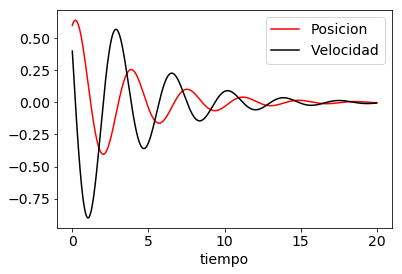

In [97]:
plt.plot(tiempo, xx, c = 'r', label="Posicion") 
plt.plot(tiempo, yy, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

In [98]:
omega0 = k/m

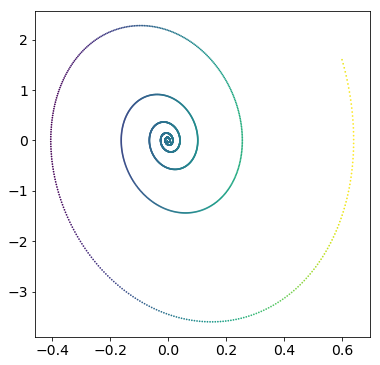

In [139]:
plt.figure(figsize = (6,6))
plt.scatter (xx, yy/omega0, lw = 0, s= 3, cmap= 'viridis', c =xx)
plt.show()

In [103]:
from ipywidgets import *


In [104]:
def amortiguado(t = 0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(tiempo, xx,  'k-')
    ax.plot(tiempo[t], xx[t],  'ro')
    ax.text(4, .6, 'tiempo =    %s'%tiempo[t])
    ax.text(4, .5, 'posición =  %s'%xx[t])
    fig.canvas.draw()
t_f = len(tiempo) 
interact_manual(amortiguado, t = (0, t_f, 1));

# Amortiguado
Si $\omega_0^2 &gt; \Gamma^2$ se tiene movimiento oscilatorio amortiguado.

In [117]:
omega0 = k/m
Gamma = B/(2*m)


In [118]:

omega0**2, Gamma**2

(0.010000000000000002, 0.0625)

In [119]:
omega0**2 > Gamma**2

False

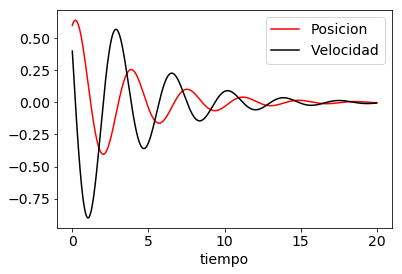

In [140]:
plt.plot(tiempo, xx, c = 'r', label="Posicion") 
plt.plot(tiempo, yy, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

In [143]:
omega0 = k/m

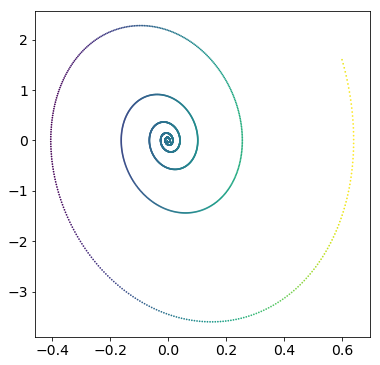

In [144]:
plt.figure(figsize = (6,6))
plt.scatter (xx, yy/omega0, lw = 0, s= 3, cmap= 'viridis', c =xx)
plt.show()

# Sobreamortiguado
Si $\omega_0^2 &lt; \Gamma^2$ se tiene movimiento oscilatorio amortiguado.

In [121]:

k = .1 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [122]:
omega0 = k/m
Gamma = B/(2*m)

In [123]:
omega0**2, Gamma**2

(0.010000000000000002, 0.0625)

In [124]:
omega0**2 < Gamma**2

True

In [125]:
inicial = [0.6, 0.4] 
tiempo = np.arange(0, 20, .01)
resultado = odeint(armonico, inicial, tiempo)

In [126]:
xxA, yyA = resultado.T  # extraer posición y velocidad.

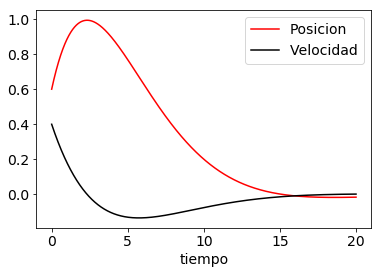

In [127]:
plt.plot(tiempo, xxA, c = 'r', label="Posicion") 
plt.plot(tiempo, yyA, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

In [145]:
omega0 = k/m

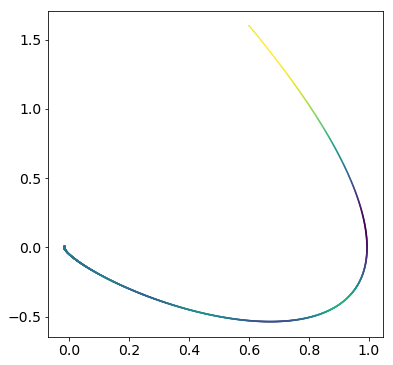

In [147]:
plt.figure(figsize = (6,6))
plt.scatter (xxA, yyA/omega0, lw = 0, s= 3, cmap= 'viridis', c =xx)
plt.show()

# Amortiguamiento crítico
Si $\omega_0^2 = \Gamma^2$ se tiene movimiento aperiódico crítico (amortiguamiento crítico).

In [128]:
k = np.sqrt(.0625) # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [129]:
omega0 = k/m
Gamma = B/(2*m)

In [130]:
omega0**2, Gamma**2

(0.0625, 0.0625)

In [131]:
omega0**2 == Gamma**2

True

In [132]:
inicial = [0.6, 0.4] 
tiempo = np.arange(0, 20, .01)
resultado = odeint(armonico, inicial, tiempo)

In [133]:
xxC, yyC = resultado.T  # extraer posición y velocidad.

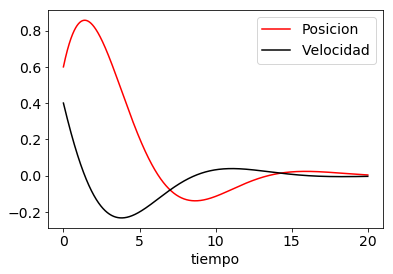

In [134]:
plt.plot(tiempo, xxC, c = 'r', label="Posicion") 
plt.plot(tiempo, yyC, c = 'k', label="Velocidad")
plt.legend(loc = 'best',prop={'size': 14})  
plt.xlabel('tiempo', fontsize = 14) 
plt.show()


In [ ]:
omega0 = k/m

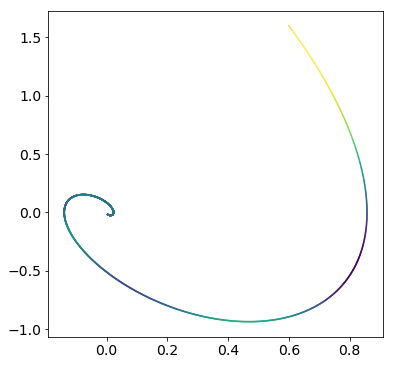

In [148]:
plt.figure(figsize = (6,6))
plt.scatter (xxC, yyC/omega0, lw = 0, s= 3, cmap= 'viridis', c =xx)
plt.show()

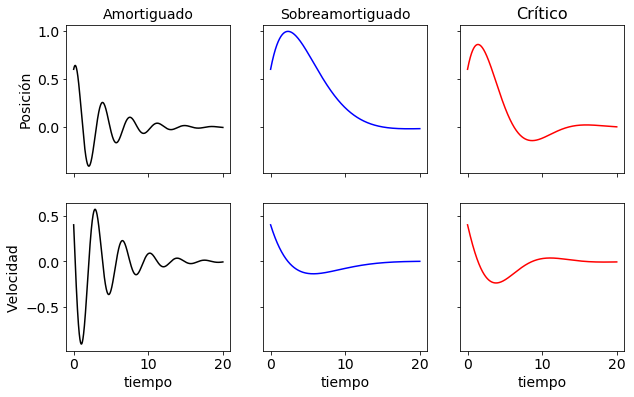

In [149]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',
                                                       sharey='row',figsize =(10,6))
ax1.plot(tiempo, xx, c = 'k') 
ax1.set_title('Amortiguado', fontsize = 14)
ax1.set_ylabel('Posición', fontsize = 14)
ax2.plot(tiempo, xxA, c = 'b') 
ax2.set_title('Sobreamortiguado', fontsize = 14)
ax3.plot(tiempo, xxC, c = 'r') 
ax3.set_title('Crítico', fontsize = 16)
ax4.plot(tiempo, yy, c = 'k')
ax4.set_ylabel('Velocidad', fontsize = 14)
ax4.set_xlabel('tiempo', fontsize = 14)
ax5.plot(tiempo, yyA, c = 'b')
ax5.set_xlabel('tiempo', fontsize = 14)
ax6.plot(tiempo, yyC, c = 'r')
ax6.set_xlabel('tiempo', fontsize = 14)
plt.show()